In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fake_count_df = pd.read_csv('fake_word_count.csv')

In [4]:
real_count_df = pd.read_csv('real_word_count.csv')

In [5]:
# Perform a full outer join on the 'Word' column
combined_df = pd.merge(real_count_df, fake_count_df, on='Word', how='outer')



# Print the resulting combined DataFrame
combined_df.head()


,Word,Count Words_x,Real_Fake_x,Count Words_y,Real_Fake_y
0,trump,16300.0,real,7137.0,fake
1,people,6318.0,real,5178.0,fake
2,new,5924.0,real,3574.0,fake
3,voters,3228.0,real,804.0,fake
4,cruz,3171.0,real,46.0,fake


In [6]:
# Fill NaN values with 0
#. combined_df['Count Words_x'].fillna(0, inplace=True)
# combined_df['Count Words_y'].fillna(0, inplace=True)

# Rename columns
combined_df.rename(columns={'Count Words_x': 'Real_Count', 'Count Words_y': 'Fake_Count'}, inplace=True)
combined_df.head(20)

,Word,Real_Count,Real_Fake_x,Fake_Count,Real_Fake_y
0,trump,16300.0,real,7137.0,fake
1,people,6318.0,real,5178.0,fake
2,new,5924.0,real,3574.0,fake
3,voters,3228.0,real,804.0,fake
4,cruz,3171.0,real,46.0,fake
5,news,2746.0,real,1798.0,fake
6,vote,2354.0,real,1228.0,fake
7,sen,1607.0,real,78.0,fake
8,need,1502.0,real,1073.0,fake
9,john,1398.0,real,804.0,fake


In [7]:
# Fill NaN values with 0
combined_df['Real_Count'].fillna(0, inplace=True)
combined_df['Fake_Count'].fillna(0, inplace=True)

In [8]:
combined_df['Ratio'] = combined_df['Fake_Count'] / combined_df['Real_Count']

In [ ]:
combined_df.head()

In [ ]:

combined_df.sort_values(by='Ratio', ascending=False, inplace=True)
combined_df.head()

In [ ]:

combined_df.sort_values(by='Ratio', ascending=True, inplace=True)
combined_df.head()

In [9]:
# Create a copy of the DataFrame
cleaned_ratio_df = combined_df.copy()

# Drop rows where 'Ratio' is either inf or 0.0
cleaned_ratio_df = cleaned_ratio_df[(cleaned_ratio_df['Ratio'] != float('inf')) & (cleaned_ratio_df['Ratio'] != 0.0)]
# Reset the index if needed
cleaned_ratio_df.reset_index(drop=True, inplace=True)

In [10]:
cleaned_ratio_df.head()

,Word,Real_Count,Real_Fake_x,Fake_Count,Real_Fake_y,Ratio
0,trump,16300.0,real,7137.0,fake,0.437853
1,people,6318.0,real,5178.0,fake,0.819563
2,new,5924.0,real,3574.0,fake,0.603309
3,voters,3228.0,real,804.0,fake,0.249071
4,cruz,3171.0,real,46.0,fake,0.014506


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Round 'Ratio' values to the nearest integer
cleaned_ratio_df['Rounded_Ratio'] = cleaned_ratio_df['Ratio'].round().astype(int)
cleaned_ratio_df.sort_values(by='Ratio', ascending=False, inplace=True)
cleaned_ratio_df.head()

,Word,Real_Count,Real_Fake_x,Fake_Count,Real_Fake_y,Ratio,Rounded_Ratio
1491,http,3.0,real,391.0,fake,130.333333,130
2002,msm,1.0,real,59.0,fake,59.000000,59
1507,lesley,3.0,real,123.0,fake,41.000000,41
1131,https,7.0,real,277.0,fake,39.571429,40
1867,splc,1.0,real,32.0,fake,32.000000,32


In [13]:
ratio_df = cleaned_ratio_df[['Rounded_Ratio','Word']]
ratio_df.head()

,Rounded_Ratio,Word
1491,130,http
2002,59,msm
1507,41,lesley
1131,40,https
1867,32,splc


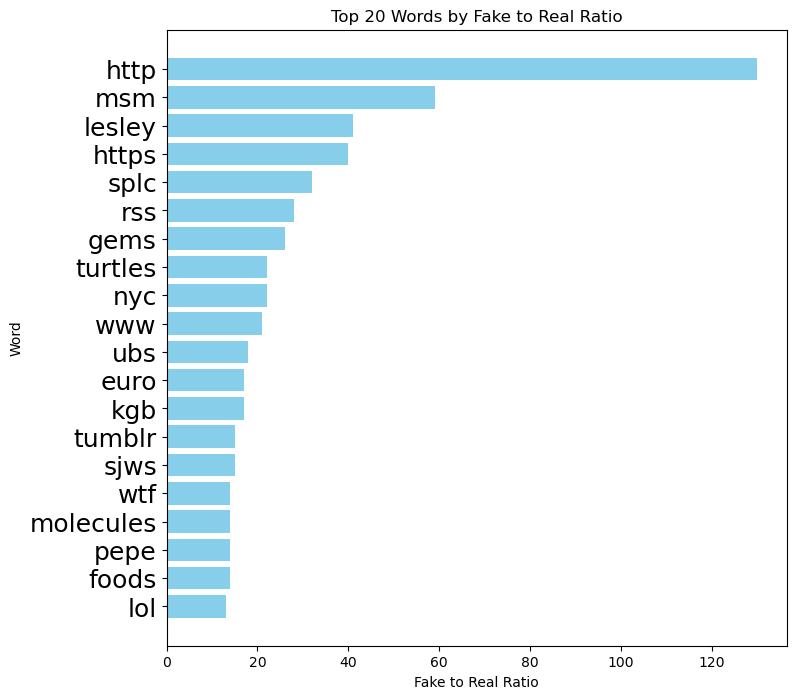

In [23]:
# Sort the DataFrame by 'Rounded_Ratio' in descending order and select the top 20 rows
top_words_df = ratio_df.sort_values(by='Rounded_Ratio', ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(8, 8))
plt.barh(top_words_df['Word'], top_words_df['Rounded_Ratio'], color='skyblue')
plt.xlabel('Fake to Real Ratio')
plt.ylabel('Word')
plt.yticks(fontsize=18)
plt.title('Top 20 Words by Fake to Real Ratio')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest ratio at the top
plt.show()

In [ ]:
# Create a dictionary mapping words to their 'Rounded_Ratio' values
#word_ratio_dict = dict(zip(ratio_df['Word'],ratio_df['Rounded_Ratio']))

# Generate the word cloud with custom sizes based on 'Rounded_Ratio' values
#wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_ratio_dict)

# Display the word cloud using matplotlib
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [ ]:
# Create a dictionary mapping words to their 'Rounded_Ratio' values
#word_ratio_dict = dict(zip(cleaned_ratio_df['Word'], cleaned_ratio_df['Rounded_Ratio']))
type(word_ratio_dict['http'])

In [ ]:
# Export the DataFrame to a CSV file
#cleaned_ratio_df.to_csv('fake-to-real_ratio.csv', index=False)